In [192]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
import random
import pylab as pl
%matplotlib inline

### Goal: Develop a model that predicts whether a biopsied breast cell is benign (not harmful) or malignant (cancerous), given a set of attributes about the cell. 

Note that there are 9 features varying from 1-10.

2 is benign and 4 is malignant 
### Begin with importing the data and exploring what it looks like:

In [78]:
## Start by importing the data into a pandas dataframe
data_df = pd.read_csv("breast-cancer-wisconsin-data.csv")
print data_df.columns 

Index([u'sample_num', u'clump_thickness', u'size_uniformity',
       u'shape_uniformity', u'adhesion', u'single_epithelial_cellsize',
       u'bare_nuclei', u'bland_chromatin', u'normal_nucleoli', u'mitoses',
       u'outcome'],
      dtype='object')


In [87]:
## Check whether all of the entries are indeed integers between 1 and 10:
print data_df.bare_nuclei.describe() 
## bare_nuclei has 11 unique values, indicating that it has more than just 1-10
## In fact, 16 entries have an unknown bare_nuclei value
print data_df.bare_nuclei.unique()

count     699
unique     11
top         1
freq      402
Name: bare_nuclei, dtype: object
['1' '10' '2' '4' '3' '9' '7' '?' '5' '8' '6']


In [86]:
## Group the data according to outcome (benign vs malignant):
benign_data = data_df[data_df.outcome == 2]
malignant_data = data_df[data_df.outcome == 4]

In [81]:
## Check whether the data has been correctly grouped (i.e., the dataframes add up to 699)
print len(benign_data)
print len(malignant_data)
print float(100*241/699)  ## 34% of the data is malignant

458
241
34.0


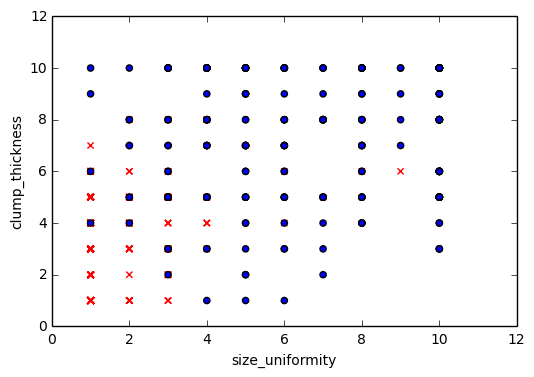

In [47]:
## Plot some of the data:
ax = benign_data.plot(x='size_uniformity', y='clump_thickness', kind='scatter', marker='x', color='r')
malignant_data.plot(x='size_uniformity', y='clump_thickness', kind='scatter', marker='o', ax=ax)

In [96]:
## Perhaps it's wise to remove the null data from the table (it's only 16 entries...)
clean_benign_data = benign_data[(benign_data.bare_nuclei != '?')]
clean_malignant_data = malignant_data[(malignant_data.bare_nuclei != '?')]
clean_data = data_df[data_df.bare_nuclei != '?']

### Now I'm going to split the data into training and test data, and try out some different models

In [171]:
X = clean_data.as_matrix(columns = ['clump_thickness', 'size_uniformity',
       'shape_uniformity', 'adhesion', 'single_epithelial_cellsize',
       'bare_nuclei', 'bland_chromatin', 'normal_nucleoli', 'mitoses'])
y = clean_data.outcome.values
reformat_y = []
for num in y:
    if num == 4:
        reformat_y.append(1)
    else:
        reformat_y.append(0)
reformat_y = np.array(reformat_y)
print len(X)
print reformat_y[0:10]

683
[0 0 0 0 0 1 0 0 0 0]


In [172]:
np.random.seed(0)
indices = np.random.permutation(len(X))
## I am going to use roughly 90% of my data to train a model (because there's limited data to begin with)
X_train = X[indices[:-68]] 
y_train = reformat_y[indices[:-68]]
X_test  = X[indices[-68:]]
y_test  = reformat_y[indices[-68:]]

In [173]:
# KNeighbors Classifier digs through training set, finds the observation w/the most similar feature vector
# I am choosing this classifier because I can't wrap my head around logistic regression w/9 features ...

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train) 
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',metric_params=None, n_jobs=1, 
                     n_neighbors=5, p=2, weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [188]:
print knn.predict(X_test)
print y_test
knn_predict = knn.predict(X_test)

[1 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 1 1 0 1 1 0 0 0 0 0 0 1 1
 0 0 0 1 1 0 1 1 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1]
[1 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 1 1 1 0 1 1 0 1 1 0 0 0 0 0 0 1 0
 0 0 0 1 1 0 1 1 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1]


In [175]:
## Determine the mean square error for the model:
mean_sq_error = (((knn.predict(X_test) - y_test) ** 2).sum()) / len(knn.predict(X_test))
print mean_sq_error

0


In [189]:
## I am not sure why the mean square error is zero. Perhaps precision and recall will tell me more useful info.

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [190]:
print recall_score(y_test, knn.predict(X_test), average='binary')
print precision_score(y_test, knn.predict(X_test), average='binary')  
print f1_score(y_test, knn.predict(X_test), average='binary')

0.961538461538
0.961538461538
0.961538461538


In [191]:
## Try to use Support Vector Machine and compare with above:

from sklearn import svm
clf = svm.SVC()
clf.fit(X_train, y_train)
svm_predict = clf.predict(X_test)
print recall_score(y_test, svm_predict, average='binary')
print precision_score(y_test, svm_predict, average='binary')
print f1_score(y_test, svm_predict, average='binary')

1.0
0.962962962963
0.981132075472


### My Conclusion: Both K Nearest Neighbors and SVM had a precision score around 96%. SVG outperformed K Nearest Neighbors in recall (100% vs 96%).

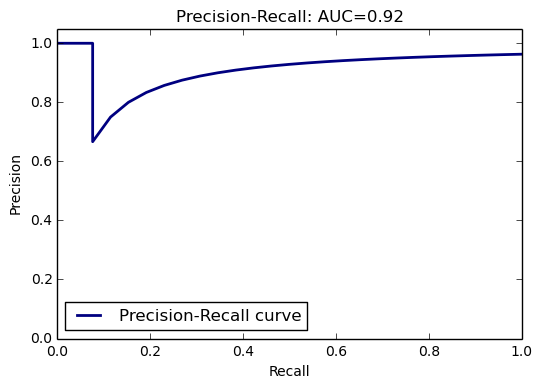

In [204]:
## Following code is unfinished.  I wouldn't submit this with a normal data
## challenge but wanted to keep it here for my own reference.

# Compute Precision-Recall and plot curve
from itertools import cycle
precision = dict()
recall = dict()
average_precision = dict()
n_classes = 2
lw = 2
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal'])


classifier = svm.SVC()
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test, y_score)
    average_precision[i] = average_precision_score(y_test, y_score)

# Compute micro-average ROC curve and ROC area
precision["micro"], recall["micro"], _ = precision_recall_curve(y_test.ravel(),
    y_score.ravel())
average_precision["micro"] = average_precision_score(y_test, y_score,
                                                     average="micro")


# Plot Precision-Recall curve
plt.clf()
plt.plot(recall[0], precision[0], lw=lw, color='navy',
         label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall: AUC={0:0.2f}'.format(average_precision[0]))
plt.legend(loc="lower left")
plt.show()

#### Note that the precision-recall curve of class 0 should be the same as class 1 because I tested a binary classifier ...